## 0. 환경 설정하기

#### 1) 구글 드라이브 연결하기

In [1]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2) 경로 확인하기

In [2]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제 시 그대로 수정 X)
WORK_SPACE = "Colab Notebooks"

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/"+WORK_SPACE+"/AIVLE3rd_individual"
else :
  ROOT_PATH = os.path.abspath('..')

# 영상을 분할한 이미지 경로
IMAGE_PATH = ROOT_PATH + "/img"
# Train 데이터 셋 경로
TRAIN_PATH = ROOT_PATH + "/train"

#### 3) Library Load 

In [3]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

## 1. 학습 데이터 세트 만들기

> [예시] 폴더 구조 <br>
> train ┐ <br>
> &emsp;&emsp; ├ jung <br>
> &emsp;&emsp; ├ park <br>
> &emsp;&emsp; ├ sam <br>
> &emsp;&emsp; ├ sayuri <br>

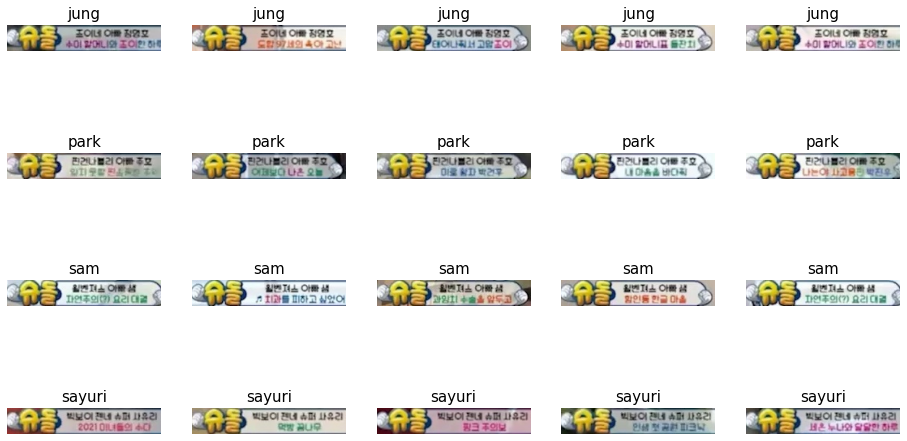

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

class_map = {
    0: 'jung',
    1: 'park',
    2: 'sam',
    3: 'sayuri',
}

image_class = glob.glob(IMAGE_PATH + "*/*")
image_class.sort()

fig, axes = plt.subplots(4, 5, figsize=(16, 9))
class_count = 0

for c in image_class:
  for i in range(5):
    original_image = cv2.imread(c + "/" + str(i*200) + ".jpg")
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    axes[class_count, i].imshow(rgb_image)
    axes[class_count, i].set_title(class_map[class_count], fontsize=15)
    axes[class_count, i].axis('off')
  class_count += 1
plt.show()

In [5]:
def croppedImage(IMAGE_PATH):
  # Bouding box
  bounding_box = {
      'start_x' : 0,
      'start_y' : 0,
      'end_x' : 320,
      'end_y' : 96
  }

  from tqdm.auto import tqdm, trange
  image_list = glob.glob(IMAGE_PATH + '/*/*.jpg')
  for image in tqdm(image_list, desc='IMAGE CROP PROGRESS'):
    original_image = cv2.imread(image)
    cropped_image = original_image[bounding_box['start_y']:bounding_box['end_y'], bounding_box['start_x']:bounding_box['end_x']]
    cv2.imwrite(image, cropped_image)

In [7]:
croppedImage(IMAGE_PATH)

IMAGE CROP PROGRESS:   0%|          | 0/864 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

#### 데이터 옮기기

In [ ]:
TRAIN_PATH = ROOT_PATH + "/train"

In [ ]:
import shutil

shutil.copytree(IMAGE_PATH, TRAIN_PATH)

'/content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/train'

## 2. 데이터 전처리

#### 1) ImageDataGenerator

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest',
)

In [ ]:
# cropped size
batch_size = 32
img_height = 96
img_width = 320

In [ ]:
# train_generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    batch_size=batch_size,
    shuffle=True,
    color_mode='grayscale',
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='training',
)

# validation_generator
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    batch_size=batch_size,
    color_mode='grayscale',
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='validation',
)

In [ ]:
class_map = {
    0: 'jung',
    1: 'park',
    2: 'sam',
    3: 'sayuri',
}

def generatorImage(generator, class_map):
  for x, y in generator:
    fig, axes = plt.subplots(4, 5, figsize=(16, 9))
    for i in range(20):
      disp_x = x[i, :, :, 0]
      axes[i//5, i%5].imshow(disp_x, cmap='gray')
      axes[i//5, i%5].set_title(class_map[np.argmax(y[i])], fontsize=15)
    
    plt.show()
    break

In [ ]:
generatorImage(train_generator, class_map)